# D'Alembert-ovo rješenje valne jednadžbe


## Rubni uvjeti na konačnoj domeni

Promotrimo problem početnih vrijednosti

\begin{align*}
&u_t+c\, u_x=0, \quad 0<x<l, \quad t>0,\quad c>0 \\
&u(x,0)=f(x).
\end{align*}

Rješenje je desni val 

$$
u(x,t)=f(x-ct),
$$

a karakteristične krivulje su pravci

$$
x(t)=ct+k,
$$

odnosno

$$
t(x)=\frac{1}{c}(x-k).
$$

U ovom slučaju možemo zadati i __rubni uvjet__ za $x=0$:

$$
u(0,t)=g(t).
$$

U desnom rubu, za $x=l$, rješenje je određeno karakterističnim pravcima: za $t\in[0,1/c]$ rješenje je određeno početnim uvjetom (plave linije), a za $t>1/c$ rješenje je određeno rubnim uvjetom (narančaste linije).

In [1]:
using Gadfly

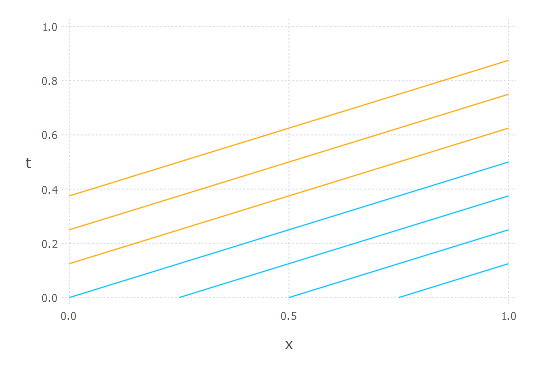

In [2]:
# Za l=1
c=2
tx(x,k)=(x-k)/c
plot(layer(x->tx(x,0),0,1),
    layer(x->tx(x,0.25),0.25,1),
    layer(x->tx(x,0.5),0.5,1),
    layer(x->tx(x,0.75),0.75,1),
    layer(x->tx(x,-0.25),0,1,Theme(default_color=colorant"orange")),
    layer(x->tx(x,-0.5),0,1,Theme(default_color=colorant"orange")),
    layer(x->tx(x,-0.75),0,1,Theme(default_color=colorant"orange")),
    Guide.xlabel("x"),Guide.ylabel("t"))

### Uvjeti kompatibilnosti

U prethodnom slučaju nema lijevih valova pa nema ni refleksije. U slučaju općenite valne jednadžbe možemo zadati rubne uvjete u oba ruba:

\begin{align*}
&u_{tt}-c^2\, u_{xx}=0, \quad 0<x<l, \quad t>0, \\
&u(x,0)=F(x), \quad u_t(x,0)=G(x),\\
&u(0,t)=a(t),\quad u(l,t)=b(t).
\end{align*}

U tom slučaju __uvjeti kompatibilnosti__ trebaju biti ispunjeni u točkama $(0,0)$ i $(l,0)$:

\begin{align*}
F(0)&=u(0,0)=a(0)\\
F(l)&=u(l,0)=b(0)\\
G(0)&=u_t(0,0)=a'(0)\\
G(l)&=u_t(l,0)=b'(0).
\end{align*}


## D'Alembert-ovo rješenje

__Teorem:__ Rješenje problema početnih vrijednosti

\begin{align*}
&u_{tt}-c^2\, u_{xx}=0, \quad x\in\mathbb{R}, \quad t>0, \\
&u(x,0)=F(x), \quad u_t(x,0)=G(x)
\end{align*}

je

$$
u(x,t)=\frac{1}{2}[F(x+ct)+F(x-ct)]+\frac{1}{2c}
\int\limits_{x-ct}^{x+ct} G(y)\, dy.
$$

_Dokaz:_ Karakteristične krivulje su pravci, a rješenje je kombinacija lijevog i desnog vala pa ima oblik

$$
u(x,t)=f(x+ct)+g(x-ct).
$$

Vrijedi

\begin{align*}
u(x,0)&=f(x)+g(x)=F(x), \tag{1}\\
u_t(x,0)&=f'(x)\cdot c+g'(x)\cdot (-c)=G(x),
\end{align*}

odnosno

$$
f'(x)-g'(x)=\frac{1}{c}G(x).
$$

Integriranje daje

$$
f(x)-g(x)=\frac{1}{c}\int G(x)\, dx=\frac{1}{c}\int\limits_0^x G(y)\, dy + C.\tag{2}
$$

Zbrajanje (1) i (2) daje

$$
f(x)=\frac{1}{2}F(x)+\frac{1}{2c}\int\limits_0^x G(y)\, dy+\frac{1}{2}C,
$$

a oduzimanje (2) od (1) daje

$$
g(x)=\frac{1}{2}F(x)-\frac{1}{2c}\int\limits_0^x G(y)\, dy-\frac{1}{2}C.
$$

Dakle, 

\begin{align*}
u(x,t)&=f(x+ct)+g(x-ct)\\
&=\frac{1}{2}[F(x+ct)+F(x-ct)] +\frac{1}{2c}\bigg[\int\limits_0^{x+ct} G(y)\, dy -
\int\limits_0^{x-ct} G(y)\, dy\bigg]
\end{align*}

i teorem je dokazan.

Vidimo da vrijednost $u(x_0,y_0)$, ovisi o početnim uvjetima na intervalu 
$x\in[x_0-c\, t_0,x_0+c\, t_0]$. 

Taj interval se zove __područje ovisnosti__ (_domain of dependence_) točke $(x_0,t_0)$. 

Slično, početni uvjeti na intervalu 
$x\in [x_1,x_2]$ utječu na rješenje unutar područja omeđenog pravcima 

$$
x+c\,t=x_1,\quad  x-c\,t=x_2, \quad t=0.
$$

To područje se zove __područje utjecaja__ (_region of influence_).

__Primjer:__ Riješenje problema

\begin{align*}
&u_{tt}-2\, u_{xx}=0, \quad x\in\mathbb{R}, \quad t>0, \\
&u(x,0)=e^{-x^2}, \quad u_t(x,0)=0,
\end{align*}

je 

$$
u(x,t)=\frac{1}{2} \big[ e^{-(x+\sqrt{2}\, t)^2} + e^{-(x-\sqrt{2}\, t)^2}\big].
$$

In [4]:
using PyPlot

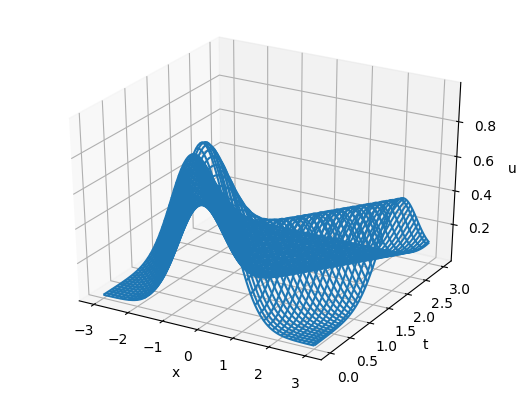

PyObject <matplotlib.text.Text object at 0x0000000045DA6080>

In [5]:
# Rješenje
gridsize=100
x=linspace(-3,3,gridsize)
t=linspace(0,3,gridsize)
X=repmat(x,1,gridsize)
T=repmat(t',gridsize,1)
u(x,t)=(exp(-(x+sqrt(2)*t)^2)+exp(-(x-sqrt(2)*t)^2))/2
U=[u(X[i,j],T[i,j]) for i=1:gridsize,j=1:gridsize]
mesh(X,T,U)
xlabel("x")
ylabel("t")
zlabel("u")

Za $k,h>0$ definirajmo točke

\begin{align*}
&A=(x-c\, k, t-h),\quad B=(x+c\,h,t+k), \\
&C=(x+c\,k,t+h),\quad D=(x-c\, h,t-k).
\end{align*}

__Lema:__ Funkcija $u(x,t)$ zadovoljava jednadžbu

$$
u_{tt}-c^2\, u_{xx}=0,\quad x\in\mathbb{R}, \quad t>0, \tag{3}
$$

ako i samo ako vrijedi

$$
u(A)+u(C)=u(B)+u(D).\tag{4}
$$

_Dokaz:_ Pretpostavimo da je 

$$
u(x,t)=f(x+c\,t)+g(x-c\,t)
$$

rješenje. Tada je

\begin{align*}
u(A)&=f(x-ck+c(t-h))+g(x-ck-c(t-h))\\
&=f(x-ck +ct-ch)+g(x-ck -ct+ch)\\
u(B)&=f(x+ch+c(t+k))+g(x+ch-c(t+k))\\
&=f(x+ch +ct+ck)+g(x+ch -ct-ck)\\
u(C)&=f(x+ck+c(t+h))+g(x+ck-c(t+h))\\
&=f(x+ck +ct+ck)+g(x+ck -ct-ch)\\
u(D)&=f(x-ch+c(t-k))+g(x-ch-c(t-k))\\
&=f(x-ch +ct-ck)+g(x-ch -ct+ck)
\end{align*}

pa (4) vrijedi.

Obrnuto, neka za $u(x,t)$ vrijedi (4).  Za $h=0$ vrijedi

$$
u(x-ck,t)+u(x+ck,t)=u(x,t+k)+u(x,t-k). \tag{5}
$$

Taylor-ova formula daje

\begin{align*} 
u(x-ck,t)&=u(x,t)+u_x(x,t)\cdot(-c)k+\frac{1}{2}u_{xx}(x,t)\cdot c^2k^2 +O(k^3)\\
u(x+ck,t)&=u(x,t)+u_x(x,t)\cdot ck+\frac{1}{2}u_{xx}(x,t)\cdot c^2k^2 +O(k^3)\\
u(x,t-k)&=u(x,t)+u_x(x,t)\cdot (-k)+\frac{1}{2}u_{tt}(x,t)\cdot k^2 +O(k^3)\\
u(x,t+k)&=u(x,t)+u_x(x,t)\cdot k+\frac{1}{2}u_{tt}(x,t)\cdot k^2 +O(k^3),
\end{align*}

pa uvrštavanje u (5), dijeljenje s $k^2$ i ignoriranje članova $O(k)$ daje (3) i teorem je dokazan.

Lema je ilustrirana sljedećom slikom:

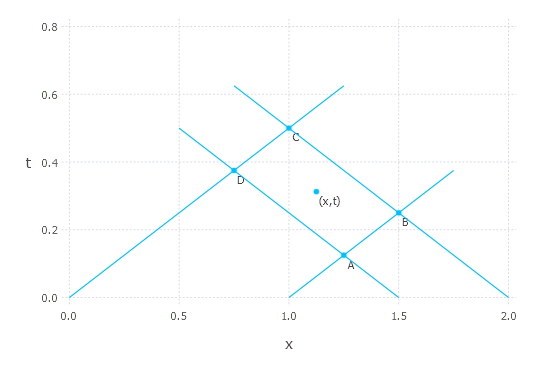

In [6]:
c=2
X = [5/4,3/2,1,3/4,9/8]
T = [1/8,1/4,1/2,3/8,5/16]
Labels = ["A","B","C","D","(x,t)"]
Gadfly.plot(layer(x->(x-1)/c,1,1.75),
    layer(x->(x-0)/c,0,1.25),
    layer(x->(x-2)/(-c),0.75,2),
    layer(x->(x-1.5)/(-c),0.5,1.5),
    layer(x=X,y=T,label=Labels,Geom.point,Geom.label),
    Guide.xlabel("x"),Guide.ylabel("t"))

Na omeđenoj domeni rješenje se konstruira na sljedeći način:

* rješenje u donjem trokutu daje D'Alembert-ova formula,
* rješenje u lijevom trokutu se dobije pomoću leme: $u(R)=u(S)+u(Q)-u(P)$, pri čemu se $u(P)$ i $u(Q)$ izračunaju D'Alembert-ovom formulom (leže u donjem trokutu), a $u(S)$ je rubni uvjet (rješenje u desnom trokutu se dobije slično),
* rješenje u prvom rombu se dobije pomoću leme: $u(M)=u(L)+u(N)-u(K)$ pri čemu se $u(K)$, $u(L)$ i $u(N)$ dobiju iz lijevog i desnog trokuta,
* u ostalim djelovima postupak se nastavlja analogno.

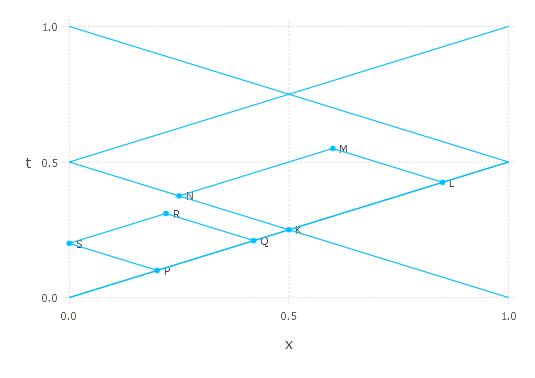

In [7]:
c=2
X = [0,0.2,0.42,0.22,0.5,0.25,0.6,0.85]
T = [0.2,0.1,0.21,0.31,0.25,0.375,0.55,0.425]
Labels = ["S","P","Q","R","K","N","M","L"]
Gadfly.plot(layer(x->x/c,0,1),
    layer(x->(x-0)/c,0,1),
    layer(x->(x-1)/(-c),0,1),
    layer(x->(x+1)/c,0,1),
    layer(x->(x-2)/(-c),0,1),
    layer(x->(x+0.4)/c,0,0.22),
    layer(x->(x-0.4)/(-c),0,0.2),
    layer(x->(x-0.84)/(-c),0.22,0.42),
    layer(x->(x+0.5)/c,0.25,0.6),
    layer(x->(x-1.7)/(-c),0.6,0.85),
    layer(x=X,y=T,label=Labels,Geom.point,Geom.label(position=:right)),
    Guide.xlabel("x"),Guide.ylabel("t"),
)

__Primjer:__ Primijenimo postupak na poluomeđenu domenu: 

\begin{align*}
&u_{tt}-c^2\, u_{xx}=0, \quad x>0, \quad t>0, \\
&u(x,0)=f(x), \quad u_t(x,0)=g(x),\quad x>0,\\
&u(0,t)=h(t),\quad t>0.
\end{align*}

Uvjeti kompatibilnosti su $f(0)=h(0)$ i $g(0)=h'(0)$. 
Karakteristične krivulje su pravci 

$$
t(x)=\frac{1}{c}(x-k).
$$

Za $0<t<\displaystyle\frac{x}{c}$ rješenje je dano D'Alembert-ovom formulom:

$$
u(x,t)=\frac{1}{2}[f(x+ct)+f(x-ct)]+\frac{1}{2c}
\int\limits_{x-ct}^{x+ct} g(y)\, dy. \tag{6}
$$

Za $0<\displaystyle\frac{x}{c}<t$ rješenje slijedi primjenom leme (lijevi trokut na gornjoj slici), odnosno

$$
u(x,t)=u(R)=u(S)+u(Q)-u(P).\tag{7}
$$

Točka $S$ leži na pravcu 

$$
y(\xi)=\frac{\xi}{c}+\big(t-\frac{x}{c}\big)
$$

pa je 

$$
u(S)=h\big(t-\frac{x}{c}\big).
$$

Točka $P$ je presjek pravca $y(\xi)=\xi/c$ s pravcem

$$
y(\xi)=-\frac{\xi}{c}+\big(t-\frac{x}{c}\big),
$$

odnosno

$$
P=\big(\frac{ct-x}{2},\frac{ct-x}{2c}\big),
$$

pa (6) daje

$$
u(P)=\frac{1}{2}[f(ct-x)+f(0)]+\frac{1}{2c}
\int\limits_{0}^{ct-x} g(y)\, dy.
$$

Slično, točka $Q$ je presjek pravca $y(\xi)=\xi/c$ s pravcem

$$
y(\xi)=-\frac{\xi}{c}+\big(t+\frac{x}{c}\big),
$$

pa je

$$
u(Q)=\frac{1}{2}[f(ct+x)+f(0)]+\frac{1}{2c}
\int\limits_{0}^{ct+x} g(y)\, dy.
$$

Uvrštavanje u (7) konačno daje

$$
u(x,t)=h\big(t-\frac{x}{c}\big)+\frac{1}{2}[f(ct+x)-f(ct-x)]+\frac{1}{2c}
\int\limits_{ct-x}^{ct+x} g(y)\, dy.
$$

Nacrtajmo rješenje problema:

\begin{align*}
&u_{tt}-2\, u_{xx}=0, \quad x>0, \quad t>0, \\
&u(x,0)=\sin x, \quad u_t(x,0)=2,\quad x>0,\\
&u(0,t)=\sin 2t,\quad t>0.
\end{align*}

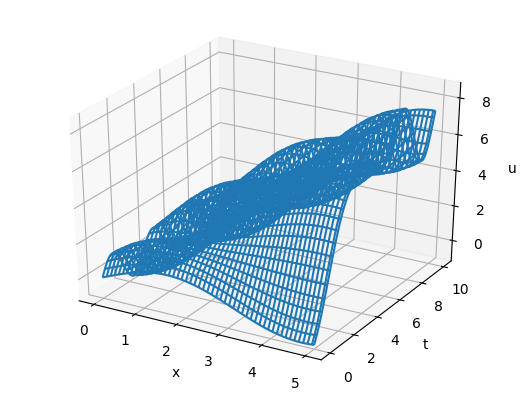

PyObject <matplotlib.text.Text object at 0x0000000045E8AD30>

In [8]:
c=sqrt(2)
f(x)=sin(x)
g(x)=2*x^0
h(t)=sin(2*t)
gridsize=100
ξ=linspace(0,5,gridsize)
τ=linspace(0,10,gridsize)
X=repmat(ξ,1,gridsize)
T=repmat(τ',gridsize,1)
U=Array{Float64}(gridsize,gridsize)
for i=1:gridsize,j=1:gridsize
    x=X[i,j]
    t=T[i,j]
   if t<=x/c
        U[i,j]=(f(x+c*t)+f(x-c*t))/2+quadgk(g,x-c*t,x+c*t)[1]/(2*c)
    else
        U[i,j]=(f(x+c*t)-f(c*t-x))/2+quadgk(g,c*t-x,x+c*t)[1]/(2*c)+h(t-x/c)
    end
end
mesh(X,T,U)
xlabel("x")
ylabel("t")
zlabel("u")

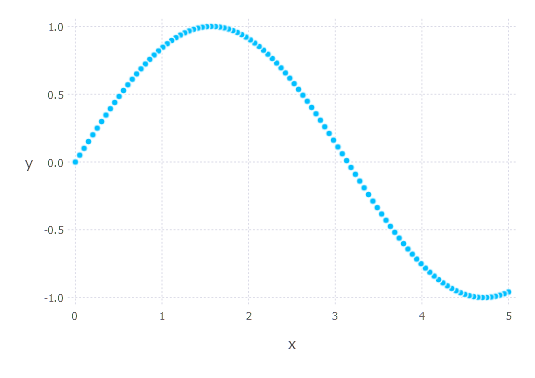

In [9]:
# Provjerimo početni uvjet
Gadfly.plot(x=ξ,y=U[:,1])

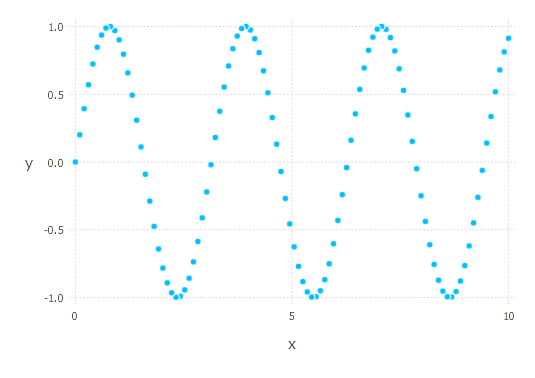

In [10]:
# Provjerimo rubni uvjet
Gadfly.plot(x=τ,y=U[1,:])